# This notebook show how to Train An Handwriting Digits with pytorch

1. import the required library,  we will use pytorch keras and tensorflow

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn

load data to local and present then. 

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
mnist_data_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_data_test = datasets.MNIST(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(mnist_data_train, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_data_test, batch_size=4, shuffle=True)

data visualization 

In [3]:
mnist_data_train.train_data.shape
#we obtain that the datasset contain 10000 image of size 28*28 

/home/gabin/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [4]:
from PIL import Image
from IPython.display import Image 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

/home/gabin/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/gabin/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


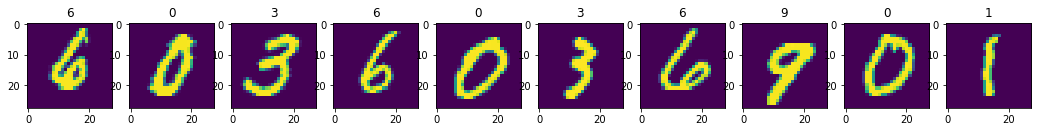

In [5]:
_, axarr = plt.subplots(1,10, figsize=(18, 2))
nb_param = 10
value = np.random.randint(10000, size= nb_param)
for i in range(nb_param):
    axarr[i].imshow(mnist_data_train.train_data[value[i]])
    axarr[i].set_title(str(mnist_data_train.train_labels[value[i]].numpy()))

Define model

In [6]:
class Model_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 128)
        self.output = nn.Linear(128, 10)
    def forward(self, x):
        x = self.hidden(x)
        x = torch.sigmoid(x)
        x = self.output(x)
        return x

In [7]:
class Model_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 4, 3, padding=1)
        self.hidden = nn.Linear(28*28*4, 128)
        self.output = nn.Linear(128, 10)
    def forward(self, x):
        #dim x -> (28*28)
        x = torch.sigmoid(self.conv(x))
        #dim x -> ()
        x = x.view(-1, 28*28*4)
        x = self.hidden(x)
        x = torch.sigmoid(x)
        x = self.output(x)
        return x

In [8]:
classifier_model, i=  Model_MLP(), False
classifier_model, i=  Model_CNN(), True

train model

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(classifier_model.parameters(), lr=0.001, momentum=0.9)

In [10]:
classifier_model.train()
test_loss = 0
correct = 0
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        if i == False:
            images = images.view(images.shape[0], -1)
        else:
            pass
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = classifier_model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.619070099830255


KeyboardInterrupt: 